# This notebook is created a part of Coventry University's Machine Learning Coursework - 7072CEM
Dataset is accessible on https://www.kaggle.com/zynicide/wine-reviews

By Sunggu Choi

# Decision Tree Regression

In [162]:
# Prevent Error
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [163]:
# Load required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

# Load dataset and Check dataset

In [15]:
# Load Dataset 
dataset = pd.read_csv('winemag_labeled.csv')
dataset_train = dataset.drop(['title_Cat','taster_name_Cat'],axis=1)

dataset_train

points  price  country_Cat  designation_Cat  province_Cat  \
0           87    0.0           22            36806           331   
1           87   15.0           32             2325           108   
2           87   14.0           41            24511           268   
3           87   13.0           41            27975           218   
4           87   65.0           41            36466           268   
...        ...    ...          ...              ...           ...   
129966      90   28.0           17             4235           232   
129967      90   75.0           41            24511           268   
129968      90   30.0           15            17463            11   
129969      90   32.0           15            24511            11   
129970      90   21.0           15            20266            11   

        region_1_Cat  region_2_Cat  variety_Cat  winery_Cat  
0                424            11          690       11608  
1                792            11          450       12956  
2               1218            17          436       13018  
3                549            11          479       14390  
4               1218            17          440       14621  
...              ...           ...          ...         ...  
129966           792            11          479        6643  
129967           787            10          440        4776  
129968            21            11          209        5929  
129969            21            11          436        6027  
129970            21            11          209        6144  

[129971 rows x 9 columns]

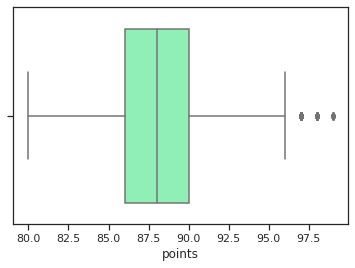

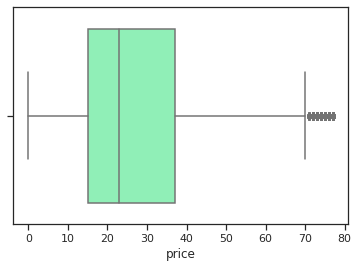

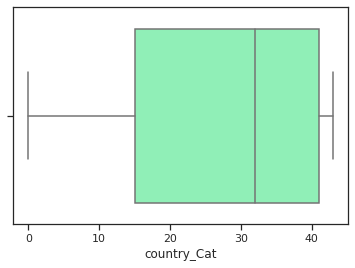

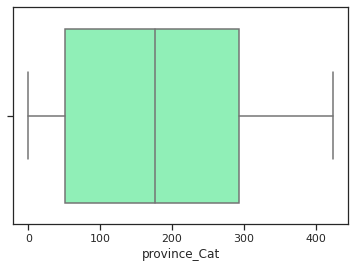

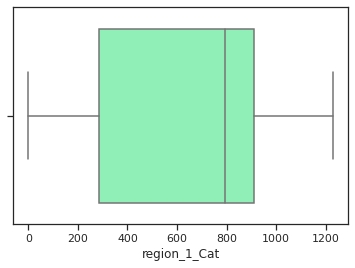

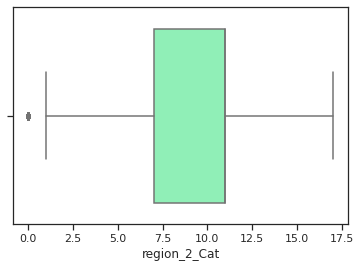

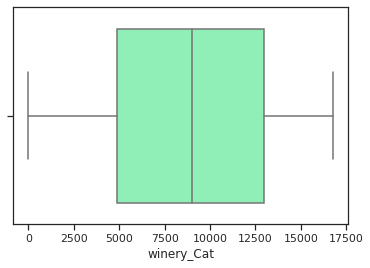

In [164]:
for col in dataset_train.columns:
    plt.figure(col)
    sns.boxplot(x=col, data=dataset_filtered, palette = 'rainbow')

<AxesSubplot:xlabel='points', ylabel='Density'>

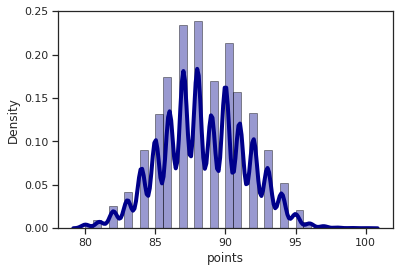

In [16]:
# Density Plot and Histogram of all arrival delays
sns.distplot(dataset_train['points'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<AxesSubplot:xlabel='price', ylabel='Density'>

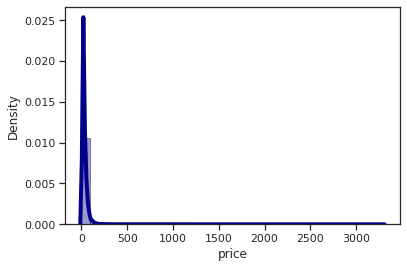

In [17]:
# Density Plot and Histogram of all arrival delays
sns.distplot(dataset_train['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<AxesSubplot:xlabel='points', ylabel='price'>

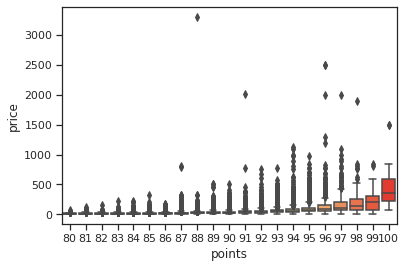

In [71]:
sns.boxplot(x='points',y='price',data=dataset_train,palette='rainbow')

Since data is skewed the data need to be in median

In [165]:
# Computing IQR
Q1 = dataset_train['price'].quantile(0.25)
Q3 = dataset_train['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
dataset_filtered = dataset_train.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
dataset_filtered

points  price  country_Cat  designation_Cat  province_Cat  \
0           87    0.0           22            36806           331   
1           87   15.0           32             2325           108   
2           87   14.0           41            24511           268   
3           87   13.0           41            27975           218   
4           87   65.0           41            36466           268   
...        ...    ...          ...              ...           ...   
129966      90   28.0           17             4235           232   
129967      90   75.0           41            24511           268   
129968      90   30.0           15            17463            11   
129969      90   32.0           15            24511            11   
129970      90   21.0           15            20266            11   

        region_1_Cat  region_2_Cat  variety_Cat  winery_Cat  
0                424            11          690       11608  
1                792            11          450       12956  
2               1218            17          436       13018  
3                549            11          479       14390  
4               1218            17          440       14621  
...              ...           ...          ...         ...  
129966           792            11          479        6643  
129967           787            10          440        4776  
129968            21            11          209        5929  
129969            21            11          436        6027  
129970            21            11          209        6144  

[122477 rows x 9 columns]

<AxesSubplot:xlabel='price', ylabel='Density'>

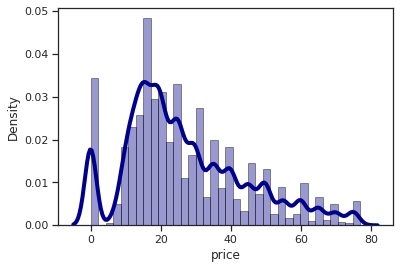

In [19]:
# Density Plot and Histogram of all arrival delays
sns.distplot(dataset_filtered['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [20]:
sns.boxplot(x='points',y='price',data=dataset_filtered,palette='rainbow')

<AxesSubplot:xlabel='points', ylabel='price'>

In [68]:
sns.pairplot(dataset_filtered)

In [70]:
plt.figure(figsize=(30,30))
sns.heatmap(dataset_filtered.corr(), annot=True)

<AxesSubplot:>

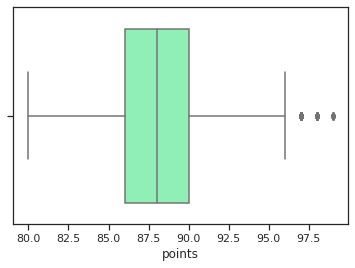

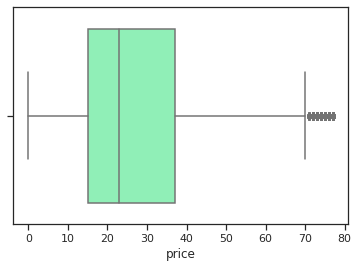

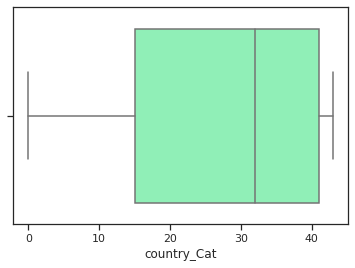

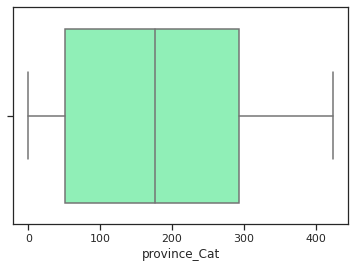

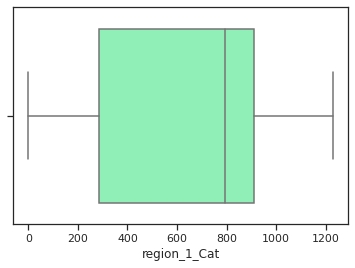

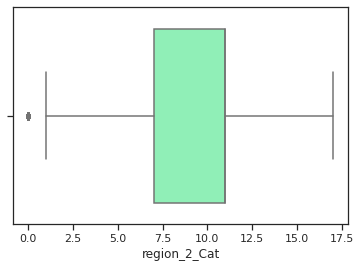

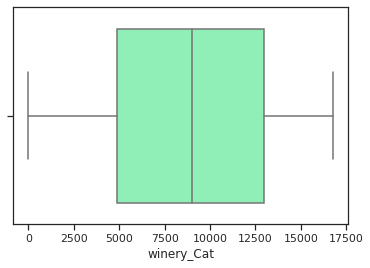

In [74]:
for col in dataset_filtered.columns:
    plt.figure(col)
    sns.boxplot(x=col, data=dataset_filtered, palette = 'rainbow')

# Constructing test environment - Decision Tree

In [21]:
X = dataset_filtered.drop('price', axis=1)
y = dataset_filtered['price']

In [37]:
# Construct pipeline
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
import scipy.stats as stats
from sklearn.utils.fixes import loguniform


# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

In [23]:
# Spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(97981, 8) (97981,)
(24496, 8) (24496,)


In [79]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
pca.explained_variance_ratio_

array([7.90348571e-01, 2.08063614e-01, 1.08363633e-03, 3.39217310e-04,
       1.63210498e-04, 1.55676112e-06, 1.19583226e-07, 7.44725003e-08])

In [87]:
dtgr = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features=None, 
                             random_state=0, 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=0, 
                             presort='deprecated', ccp_alpha=0.0)

dtgrPipe = Pipeline([
     ('pca', PCA(n_components=2)),
     ('normalize', Normalizer()),
     ('regressor', dtgr)
    
])
dtgrPipe.steps

dtgrModel = dtgrPipe.fit(X_train, y_train) # Define model
y_pred = dtgrPipe.predict(X_test) #Prediction

mse = dtgrPipe.score(X_test, y_test)

print("R-Squared on train dataset={}".format(dtgrPipe.score(X_test,y_test)))
print("R-Squaredon test dataset={}".format(dtgrPipe.score(X_test,y_test)))

print("#########################################")


print("Decision Tree Regression model mean squared error:", mse)


# accuracy = metrics.r2_score(y, predictions)
# print ('accuracy',accuracy*100,'%')
# print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))


# from sklearn import metrics
# df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
# # df

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("##############################")



R-Squared on train dataset=0.06449149873208393
R-Squaredon test dataset=0.06449149873208393
#########################################
Decision Tree Regression model mean squared error: 0.06449149873208393
Mean Absolute Error: 9.792399115372255
Mean Squared Error: 276.03972778362197
Root Mean Squared Error: 16.614443348593475
##############################


In [89]:
param_grid = {"regressor__criterion": ["mse", "mae"],
              "regressor__min_samples_split": [10, 20, 40],
              "regressor__max_depth": [2, 6, 8],
              "regressor__min_samples_leaf": [20, 40, 100],
              "regressor__max_leaf_nodes": [5, 20, 100],
              }


# distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])


randomSearchCV = RandomizedSearchCV(dtgrModel, param_distributions=param_grid, n_iter=10, scoring='r2',
                            n_jobs=-1, cv=5,  verbose=3, random_state=0)


randomSearchCV.fit(X, y)
# summarize result
print('Best Score: %s' % randomSearchCV.best_score_)
print('Best Hyperparameters: %s' % randomSearchCV.best_params_)

result = randomSearchCV.best_score_
print(result/100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed: 16.7min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 18.3min finished


Best Score: 0.024840067861703275
Best Hyperparameters: {'regressor__min_samples_split': 40, 'regressor__min_samples_leaf': 20, 'regressor__max_leaf_nodes': 100, 'regressor__max_depth': 8, 'regressor__criterion': 'mse'}
2.4840067861703274


In [94]:
print('Best Score: %s' % randomSearchCV.best_score_)
print('Best Hyperparameters: %s' % randomSearchCV.best_params_)

Best Score: 0.024840067861703275
Best Hyperparameters: {'regressor__min_samples_split': 40, 'regressor__min_samples_leaf': 20, 'regressor__max_leaf_nodes': 100, 'regressor__max_depth': 8, 'regressor__criterion': 'mse'}
Best Hyperparameters: 0.024840067861703275


In [95]:
df = pd.DataFrame(data=randomSearchCV.cv_results_)
df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.441154      0.020851         0.005625        0.000356   
1     502.705958     20.922411         0.008967        0.001033   
2     505.216017     25.369981         0.008508        0.000609   
3       0.424132      0.081680         0.005079        0.000638   
4       0.448182      0.037623         0.005136        0.000428   

  param_regressor__min_samples_split param_regressor__min_samples_leaf  \
0                                 10                                40   
1                                 40                                40   
2                                 20                                20   
3                                 20                               100   
4                                 40                               100   

  param_regressor__max_leaf_nodes param_regressor__max_depth  \
0                              20                          8   
1                             100                          6   
2                              20                          8   
3                               5                          2   
4                              20                          6   

  param_regressor__criterion  \
0                        mse   
1                        mae   
2                        mae   
3                        mse   
4                        mse   

                                              params  split0_test_score  \
0  {'regressor__min_samples_split': 10, 'regresso...           0.018696   
1  {'regressor__min_samples_split': 40, 'regresso...          -0.022269   
2  {'regressor__min_samples_split': 20, 'regresso...          -0.026719   
3  {'regressor__min_samples_split': 20, 'regresso...           0.010209   
4  {'regressor__min_samples_split': 40, 'regresso...           0.019291   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.015292           0.022688           0.017360           0.020001   
1          -0.036199          -0.019483          -0.036067          -0.029418   
2          -0.043081          -0.028815          -0.036466          -0.038732   
3           0.006513           0.012202           0.007344           0.010640   
4           0.015170           0.022259           0.017515           0.019954   

   mean_test_score  std_test_score  rank_test_score  
0         0.018807        0.002488                3  
1        -0.028687        0.006890                6  
2        -0.034763        0.006131                8  
3         0.009382        0.002126                4  
4         0.018838        0.002381                2

In [135]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score', 'param_regressor__max_leaf_nodes','param_regressor__max_depth']],
             x='param_regressor__max_depth',y='mean_test_score', ax=ax)

ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")



[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

In [111]:
r2_scores = cross_val_score(randomSearchCV.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(randomSearchCV.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.026
MSE::-287.396


# K-NN Regression

## Designing model

In [136]:
# Construct pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [139]:
knnregr = KNeighborsRegressor(n_neighbors=5, weights='uniform',
                              algorithm='auto', leaf_size=30, p=2,
                              metric='minkowski', metric_params=None, n_jobs=-1)
knnregrPipe = Pipeline([
     ('scaler', StandardScaler()),
     ('normalize', Normalizer()),
     ('regressor' , knnregr)
])
knnregrPipe.steps

knnregrModel = knnregrPipe.fit(X_train, y_train) # Define model
y_pred = knnregrPipe.predict(X_test) #Prediction


mse = knnregrPipe.score(X_test, y_test)

print("R-Squared on train dataset={}".format(knnregrPipe.score(X_test,y_test)))
print("R-Squaredon test dataset={}".format(knnregrPipe.score(X_test,y_test)))

print("#########################################")


print("Decision Tree Regression model mean squared error:", mse)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("##############################")

R-Squared on train dataset=0.36285475752719654
R-Squaredon test dataset=0.36285475752719654
#########################################
Decision Tree Regression model mean squared error: 0.36285475752719654
Mean Absolute Error: 9.719472566949706
Mean Squared Error: 188.00192521227956
Root Mean Squared Error: 13.711379405890552
##############################


## Find hyperparameter for optimaised paramter
This time random research were used

In [152]:
param_grid = {"regressor__n_neighbors" : [5, 10, 15], 
              "regressor__weights": ["uniform"],
              "regressor__algorithm" :["auto"], 
              "regressor__leaf_size":[30,60,90], 
              "regressor__p":[2, 4, 8],
              }


randomSearchCV = RandomizedSearchCV(knnregrModel, param_distributions=param_grid, n_iter=10, scoring='r2',
                            n_jobs=-1, cv=5, verbose=3, random_state=0)


randomSearchCV.fit(X, y)
# summarize result
print('Best Score: %s' % randomSearchCV.best_score_)
print('Best Hyperparameters: %s' % randomSearchCV.best_params_)

result = randomSearchCV.best_score_
print(result/100)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:   37.3s remaining:    5.1s


Best Score: 0.3822541037904948
Best Hyperparameters: {'regressor__weights': 'uniform', 'regressor__p': 2, 'regressor__n_neighbors': 15, 'regressor__leaf_size': 90, 'regressor__algorithm': 'auto'}
0.003822541037904948


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   40.8s finished


In [143]:
print('Best Score: %s' % randomSearchCV.best_score_)
print('Best Hyperparameters: %s' % randomSearchCV.best_params_)

Best Score: 0.3807088585284376
Best Hyperparameters: {'regressor__weights': 'uniform', 'regressor__p': 2, 'regressor__n_neighbors': 10, 'regressor__leaf_size': 30, 'regressor__algorithm': 'auto'}


In [144]:
df = pd.DataFrame(data=randomSearchCV.cv_results_)
df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.329331      0.075664         0.846471        0.216323   
1       0.261510      0.113332         0.879485        0.144853   
2       0.351090      0.106191         1.262930        0.135942   
3       0.283450      0.137789         1.101546        0.229236   

  param_regressor__weights param_regressor__p param_regressor__n_neighbors  \
0                  uniform                  2                            5   
1                  uniform                  2                           10   
2                  uniform                  2                            5   
3                  uniform                  2                           10   

  param_regressor__leaf_size param_regressor__algorithm  \
0                         30                       auto   
1                         30                       auto   
2                         60                       auto   
3                         60                       auto   

                                              params  split0_test_score  \
0  {'regressor__weights': 'uniform', 'regressor__...           0.358054   
1  {'regressor__weights': 'uniform', 'regressor__...           0.374353   
2  {'regressor__weights': 'uniform', 'regressor__...           0.357928   
3  {'regressor__weights': 'uniform', 'regressor__...           0.373875   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.358557           0.357605           0.356602           0.377170   
1           0.379406           0.377886           0.375888           0.396011   
2           0.357743           0.357432           0.356515           0.377061   
3           0.379264           0.377697           0.376116           0.395916   

   mean_test_score  std_test_score  rank_test_score  
0         0.361598        0.007813                3  
1         0.380709        0.007842                1  
2         0.361336        0.007878                4  
3         0.380573        0.007875                2

[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

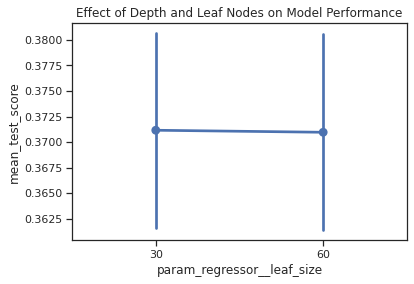

In [147]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score', 'param_regressor__n_neighbors','param_regressor__leaf_size']],
             x='param_regressor__leaf_size',y='mean_test_score', ax=ax)

ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")



In [148]:
r2_scores = cross_val_score(randomSearchCV.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(randomSearchCV.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.386
MSE::-180.986


# Random Forest Regression

In [149]:
# Construct pipeline
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [150]:
rfRegr = RandomForestRegressor(n_estimators=100, 
                             criterion='mse',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features='auto',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             bootstrap=True,
                             oob_score=False,
                             n_jobs=None,
                             random_state=None,
                             verbose=0, 
                             warm_start=False, ccp_alpha=0.0, max_samples=None)

rfRegrPipe = Pipeline([
     ('scaler', StandardScaler()),
     ('normalize', Normalizer()),
     ('regressor', rfRegr)
])
rfRegrPipe.steps

rfRegrModel = rfRegrPipe.fit(X_train, y_train) #model
y_pred = rfRegrPipe.predict(X_test) #Prediction


mse = rfRegrPipe.score(X_test, y_test)
print("Decision Tree Regression model mean squared error")
print("R-Squared on train dataset={}".format(rfRegrPipe.score(X_test,y_test)))
print("R-Squaredon test dataset={}".format(rfRegrPipe.score(X_test,y_test)))

print("#########################################")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("#########################################")

Decision Tree Regression model mean squared error: 0.47992822477463415
Mean Absolute Error: 8.357144963138412
Mean Squared Error: 153.45715305268124
Root Mean Squared Error: 12.387782410612532


## Find hyperparameter for optimaised paramter
This time random research were used

In [156]:
param_grid = {"regressor__n_estimators" : [10, 100, 200],
              "regressor__criterion":["mse"],
              "regressor__min_samples_split":[2, 10, 30],
              "regressor__min_samples_leaf":[1, 5, 10]
             }

randomSearchCV = RandomizedSearchCV(rfRegrModel, param_distributions=param_grid, n_iter=10, scoring='r2',
                            n_jobs=-1, cv=5, verbose=3, random_state=0)


randomSearchCV.fit(X, y)
# summarize result
print('Best Score: %s' % randomSearchCV.best_score_)
print('Best Hyperparameters: %s' % randomSearchCV.best_params_)

result = randomSearchCV.best_score_
print(result/100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed: 10.2min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.5min finished


Best Score: 0.4775289575893331
Best Hyperparameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__criterion': 'mse'}
0.0047752895758933316


In [157]:
print('Best Score: %s' % randomSearchCV.best_score_)
print('Best Hyperparameters: %s' % randomSearchCV.best_params_)

Best Score: 0.4775289575893331
Best Hyperparameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__criterion': 'mse'}


In [158]:
df = pd.DataFrame(data=randomSearchCV.cv_results_)
df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     229.915338      1.264548         1.983627        0.045479   
1       8.479108      0.066646         0.046018        0.003952   
2     192.090046      1.125079         1.102214        0.023748   
3     183.128322      2.424201         0.930331        0.034033   
4     213.956451      2.305102         1.255911        0.020247   

  param_regressor__n_estimators param_regressor__min_samples_split  \
0                           200                                  2   
1                            10                                 30   
2                           200                                 10   
3                           200                                 30   
4                           200                                 10   

  param_regressor__min_samples_leaf param_regressor__criterion  \
0                                 1                        mse   
1                                10                        mse   
2                                 5                        mse   
3                                 5                        mse   
4                                 1                        mse   

                                              params  split0_test_score  \
0  {'regressor__n_estimators': 200, 'regressor__m...           0.468157   
1  {'regressor__n_estimators': 10, 'regressor__mi...           0.423036   
2  {'regressor__n_estimators': 200, 'regressor__m...           0.460403   
3  {'regressor__n_estimators': 200, 'regressor__m...           0.446662   
4  {'regressor__n_estimators': 200, 'regressor__m...           0.467233   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.471731           0.473432           0.482813           0.491511   
1           0.428887           0.420702           0.436698           0.445064   
2           0.465053           0.463052           0.474357           0.483668   
3           0.448916           0.445296           0.459245           0.466341   
4           0.471076           0.470536           0.480567           0.490186   

   mean_test_score  std_test_score  rank_test_score  
0         0.477529        0.008505                1  
1         0.430877        0.008990               10  
2         0.469307        0.008582                4  
3         0.453292        0.008158                8  
4         0.475920        0.008403                2

In [161]:
r2_scores = cross_val_score(randomSearchCV.best_estimator_, X, y, n_jobs=-1, cv=10)
mse_scores = cross_val_score(randomSearchCV.best_estimator_, X, y, n_jobs=-1, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.490
MSE::-150.340
